### Importing libraries

In [2]:
pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.6 kB 544.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.6 kB 726.2 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.6 kB 722.1 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.6 kB 827.9 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/294.6 kB 947.5 kB/s eta 0:00:01
   -------------------------------------- 294.6/294.6 kB 908.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud



  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ca/4a/49ceaa60945f2e0077c25117dd99c7e6efdea9cc970787d0637a36e39014/wordcloud-1.9.2-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/153.3 kB ? eta -:--:--
   --------------------- ------------------ 81.9/153.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 153.3/153.3 kB 1.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer


In [6]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


In [7]:
# importing the dataset

df = pd.read_csv("D:\cyberbullying_tweets.csv")

In [8]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


### EDA

In [9]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [10]:
# length of dataset
len(df)

47692

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [12]:
# Checking for null values
np.sum(df.isnull())

C:\Users\CR2000TU\anaconda3\envs\Work\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


tweet_text            0
cyberbullying_type    0
dtype: int64

In [13]:
# storing the data in lists
tweet, type = list(df['tweet_text']), list(df['cyberbullying_type'])

In [14]:
df.iloc[0][0]

C:\Users\CR2000TU\AppData\Local\Temp\ipykernel_11376\2900375399.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[0][0]


'In other words #katandandre, your food was crapilicious! #mkr'

In [15]:
# Encoding the labels
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['cyberbullying_type_encoded'] = labelencoder.fit_transform(df['cyberbullying_type'])

In [16]:
df[['cyberbullying_type', 'cyberbullying_type_encoded']].value_counts()

cyberbullying_type   cyberbullying_type_encoded
religion             5                             7998
age                  0                             7992
gender               2                             7973
ethnicity            1                             7961
not_cyberbullying    3                             7945
other_cyberbullying  4                             7823
Name: count, dtype: int64

In [17]:
# converting tweet text to lower case
df['tweet_text'] = df['tweet_text'].str.lower()
df.tail()

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
47687,"black ppl aren't expected to do anything, depe...",ethnicity,1
47688,turner did not withhold his disappointment. tu...,ethnicity,1
47689,i swear to god. this dumb nigger bitch. i have...,ethnicity,1
47690,yea fuck you rt @therealexel: if youre a nigge...,ethnicity,1
47691,bro. u gotta chill rt @chillshrammy: dog fuck ...,ethnicity,1


In [18]:
# stopwords list that needs to be excluded from the data
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [19]:
# removing stopwoords from the tweet text
STOPWORDS = set(stopwordlist)

def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['tweet_text'] = df['tweet_text'].apply(lambda text: clean_stopwords(text))

In [20]:
# cleaning and removing punctuations

import string
english_puctuations = string.punctuation

def clean_puctuations(text):
    translator = str.maketrans('','', english_puctuations)
    return text.translate(translator)

df['tweet_text'] = df['tweet_text'].apply(lambda x : clean_puctuations(x))


In [21]:
df['tweet_text'][20]

'halalcunty biebervalue liamxkiwi greenlinerzjm halalflaws know saudis chased girls burning building httptco8b1aclczn9'

In [22]:
# cleaning and removing repeating characters

def clean_repeating_characters(text):
    return re.sub(r'(.)1+', r'1', text)

df['tweet_text'] = df['tweet_text'].apply(lambda x: clean_repeating_characters(x))

In [23]:
df['tweet_text'][55]

'bullshit mkr mkr215'

In [24]:
# cleaning and removing URLs

def clean_URLs(text):
    return re.sub(r"((www.[^s]+)|(http\S+))","",text)

df['tweet_text'] = df['tweet_text'].apply(lambda x : clean_URLs(x))

In [25]:
df['tweet_text'][280]

'andaasonsan '

In [26]:
# cleaning and removing numeric data

def clean_numeric(text):
    return re.sub('[0-9]+', '', text)
    
df['tweet_text'] = df['tweet_text'].apply(lambda x: clean_numeric(x))

In [27]:
df['tweet_text'][223]

'fact  cute boys world  go school sick shit'

In [28]:
# Tokenization of tweet text

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
df['tweet_text'] = df['tweet_text'].apply(tokenizer.tokenize)

In [29]:
df['tweet_text'][24]

['wishing',
 'arena',
 'partner',
 'on',
 'gtgt',
 'really',
 'want',
 'get',
 'pvp',
 'happening']

In [30]:
# stemming

import nltk

st = nltk.PorterStemmer()

def text_stemming(text):
    text = [st.stem(word) for word in text]
    return text

df['tweet_text'] = df['tweet_text'].apply(lambda x: text_stemming(x))

In [31]:
df['tweet_text'][35]

['andythewooki',
 'what',
 'quot',
 'jack',
 'off',
 'one',
 'hand',
 'point',
 'other']

In [32]:
# lemmatization

lm = nltk.WordNetLemmatizer()

def text_lemmatization(text):
    text = [lm.lemmatize(word) for word in text]
    return text

df['tweet_text'] = df['tweet_text'].apply(lambda x: text_lemmatization(x))

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\CR2000TU/nltk_data'
    - 'C:\\Users\\CR2000TU\\anaconda3\\envs\\Work\\nltk_data'
    - 'C:\\Users\\CR2000TU\\anaconda3\\envs\\Work\\share\\nltk_data'
    - 'C:\\Users\\CR2000TU\\anaconda3\\envs\\Work\\lib\\nltk_data'
    - 'C:\\Users\\CR2000TU\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [33]:
df['tweet_text'].head()

0             [word, katandandr, food, crapilici, mkr]
1    [aussietv, white, mkr, theblock, imacelebritya...
2    [xochitlsuckkk, classi, whore, red, velvet, cu...
3    [jasongio, meh, p, thank, head, up, but, not, ...
4    [rudhoeenglish, isi, account, pretend, kurdish...
Name: tweet_text, dtype: object

In [34]:
df[['cyberbullying_type', 'cyberbullying_type_encoded']].value_counts()


cyberbullying_type   cyberbullying_type_encoded
religion             5                             7998
age                  0                             7992
gender               2                             7973
ethnicity            1                             7961
not_cyberbullying    3                             7945
other_cyberbullying  4                             7823
Name: count, dtype: int64

In [35]:
# plotting word cloud excluding other_cybberbullying and not_cyberbullying
new_df = df
new_df = new_df[new_df['cyberbullying_type'] != 'other_cyberbullying']
new_df = new_df[new_df['cyberbullying_type'] != 'not_cyberbullying']
new_df = new_df['tweet_text'].apply(lambda x: " ".join(x))

In [36]:
new_df

7945     rape realzvasiyana nema joke drunk gay lesbian...
7946     never saw celebr say anyth like obama b maher ...
7947     manhattaknight mean he gay but use gender slur...
7948     rt raulnovo aliciabernardez alexaim mecaesm fe...
7949     rape rape fact read one post guy get rape comm...
                               ...                        
47687    black ppl arent expect anyth depend anyth yet ...
47688    turner not withhold disappoint turner call cou...
47689    swear god dumb nigger bitch got bleach hair re...
47690    yea fuck rt therealexel nigger fuck unfollow m...
47691    bro u gotta chill rt chillshrammi dog fuck kp ...
Name: tweet_text, Length: 31924, dtype: object

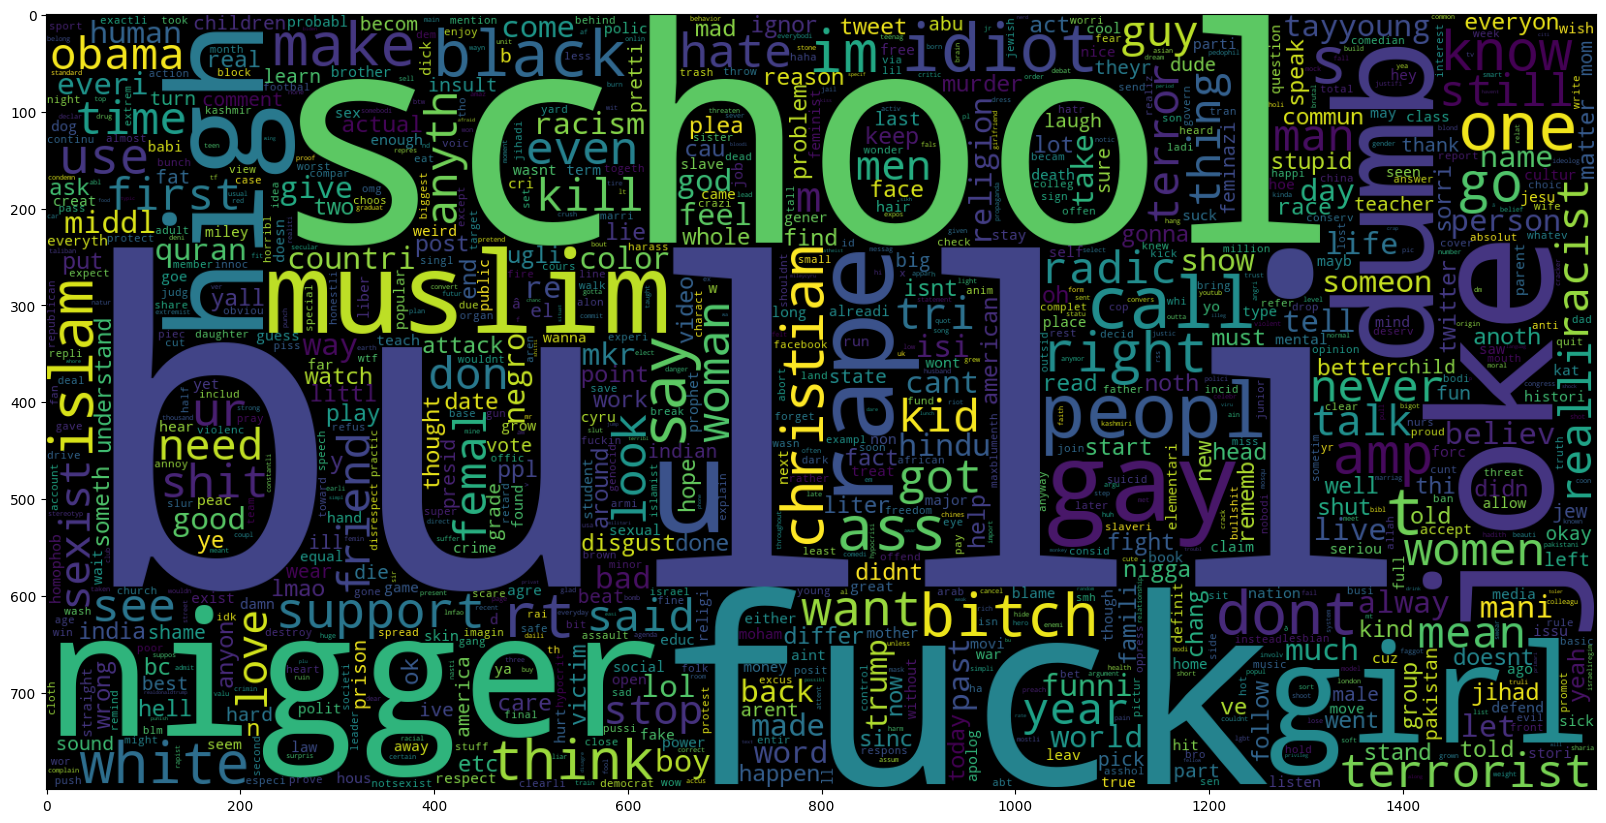

In [37]:
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(new_df))
plt.imshow(wc)

In [38]:
# Creating a word cloud
# We will have to exclude the tweets which are not_cyberbullying for this task 
data = pd.read_csv("cyberbullying_tweets.csv")
data = data[data['cyberbullying_type'] != "not_cyberbullying"]
data['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
other_cyberbullying    7823
Name: count, dtype: int64

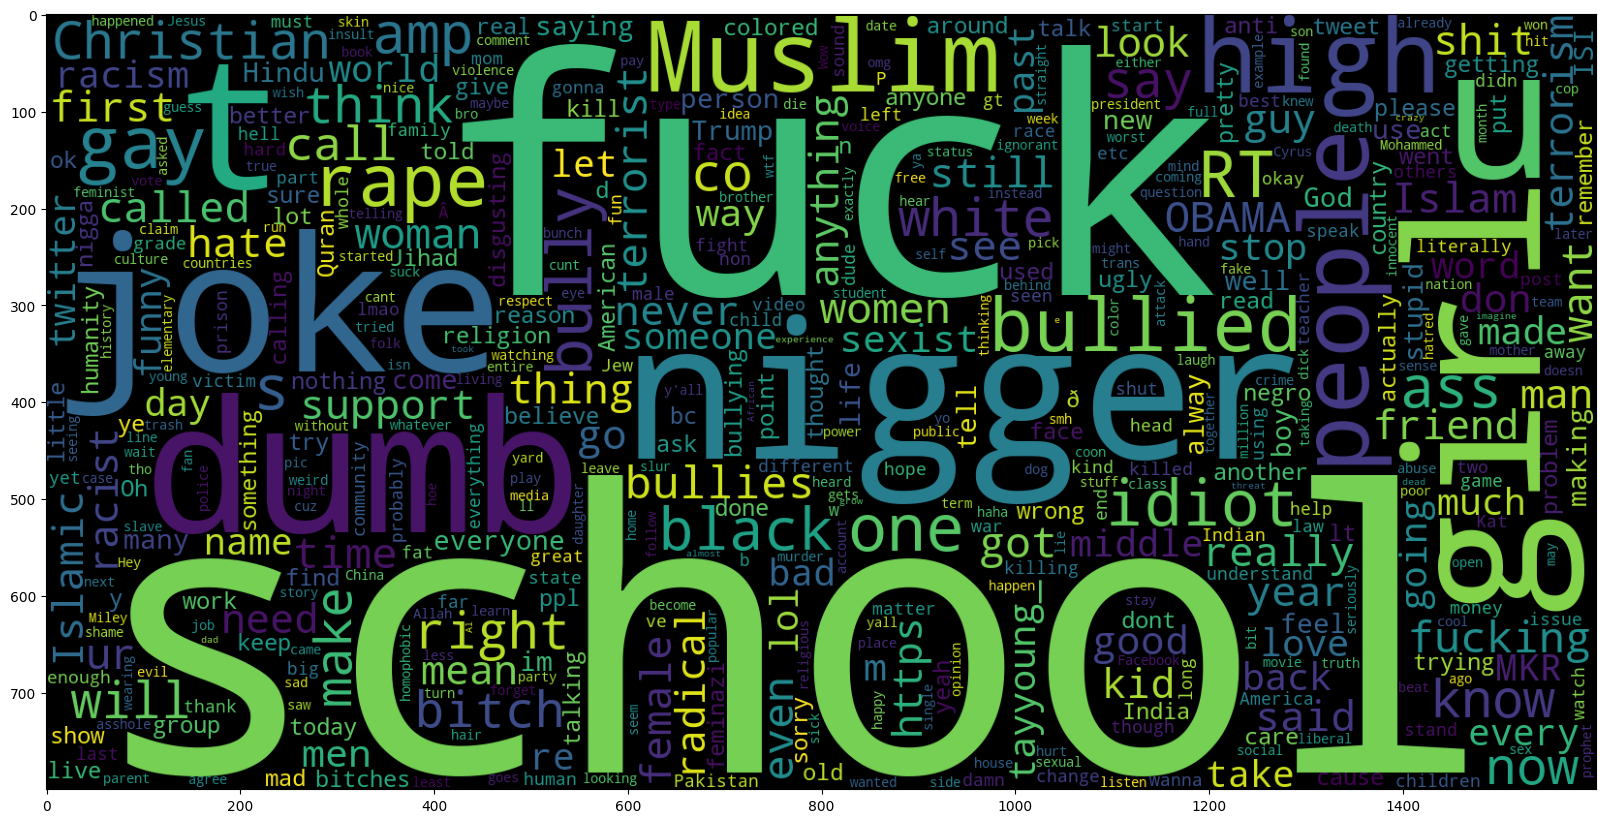

In [39]:
# word cloud

plotting_data = data['tweet_text']
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=500, width= 1600, height= 800, 
                collocations= False).generate(' '.join(plotting_data))
plt.imshow(wc)

The Data visualization shows the words which are obvious in case of cyberbullying. But the word school seems odd here.

In [40]:
# excluding the other_cyberbullying values and plotting again
data_2 = data[data['cyberbullying_type'] != "not_cyberbullying"]
data_2 = data[data['cyberbullying_type'] != "other_cyberbullying"]
data_2['cyberbullying_type'].value_counts()

cyberbullying_type
religion     7998
age          7992
gender       7973
ethnicity    7961
Name: count, dtype: int64

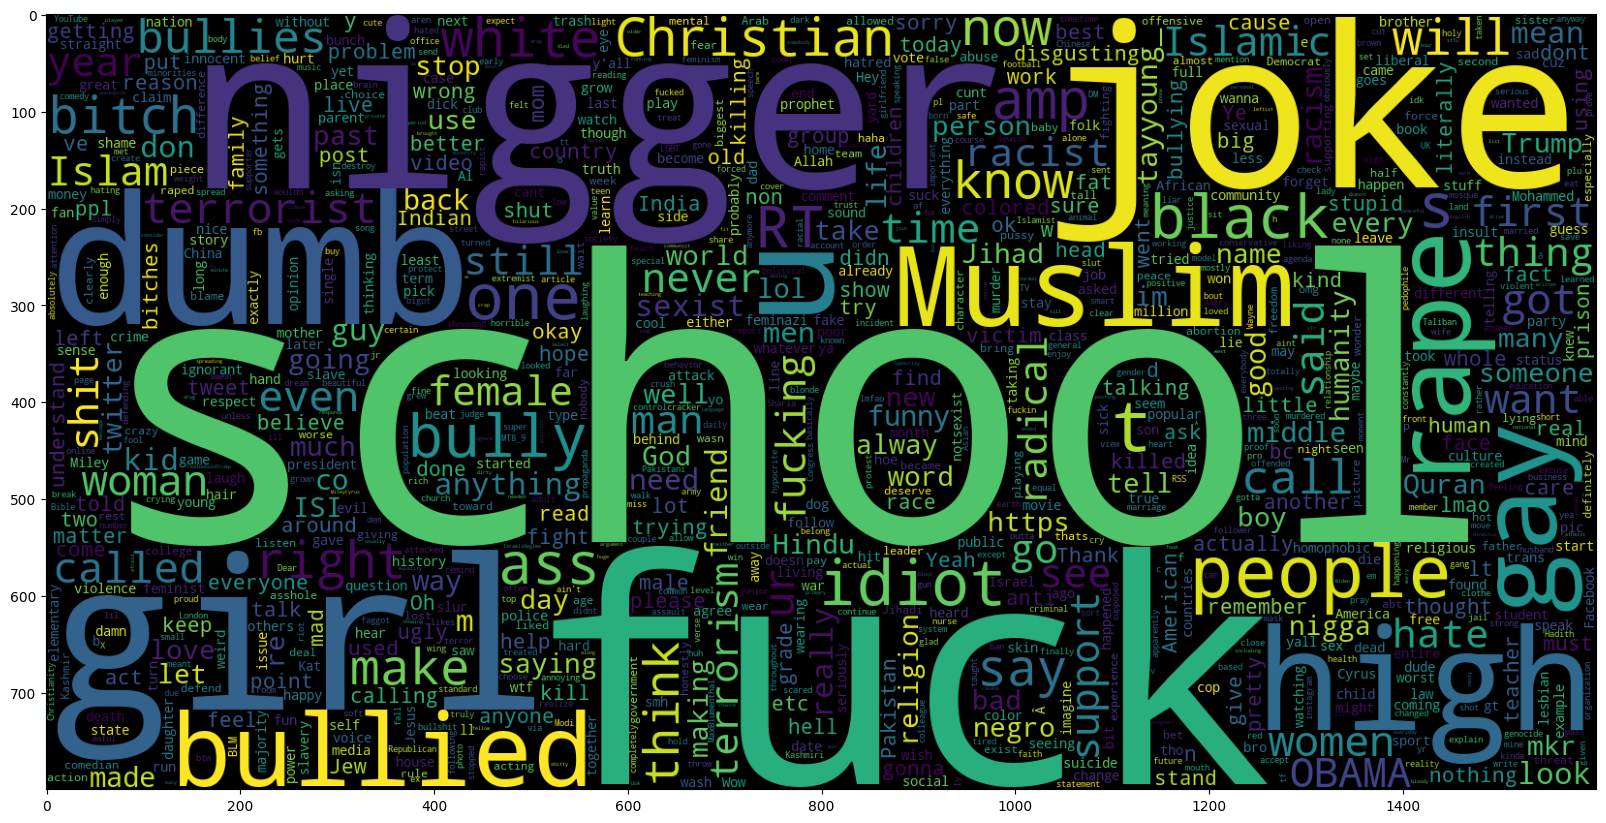

In [41]:
plotting_data = data_2['tweet_text']
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(plotting_data))
plt.imshow(wc)

In [42]:
df

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,"[word, katandandr, food, crapilici, mkr]",not_cyberbullying,3
1,"[aussietv, white, mkr, theblock, imacelebritya...",not_cyberbullying,3
2,"[xochitlsuckkk, classi, whore, red, velvet, cu...",not_cyberbullying,3
3,"[jasongio, meh, p, thank, head, up, but, not, ...",not_cyberbullying,3
4,"[rudhoeenglish, isi, account, pretend, kurdish...",not_cyberbullying,3
...,...,...,...
47687,"[black, ppl, arent, expect, anyth, depend, any...",ethnicity,1
47688,"[turner, not, withhold, disappoint, turner, ca...",ethnicity,1
47689,"[swear, god, dumb, nigger, bitch, got, bleach,...",ethnicity,1
47690,"[yea, fuck, rt, therealexel, nigger, fuck, unf...",ethnicity,1


We will consider the first Visualization.

### Model Creation

In [43]:
df['tweet_text'] = df['tweet_text'].apply(lambda x : " ".join(x))
df

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,word katandandr food crapilici mkr,not_cyberbullying,3
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,3
2,xochitlsuckkk classi whore red velvet cupcak,not_cyberbullying,3
3,jasongio meh p thank head up but not concern a...,not_cyberbullying,3
4,rudhoeenglish isi account pretend kurdish acco...,not_cyberbullying,3
...,...,...,...
47687,black ppl arent expect anyth depend anyth yet ...,ethnicity,1
47688,turner not withhold disappoint turner call cou...,ethnicity,1
47689,swear god dumb nigger bitch got bleach hair re...,ethnicity,1
47690,yea fuck rt therealexel nigger fuck unfollow m...,ethnicity,1


In [72]:
# Splitting the data into train and test
X, y = df['tweet_text'], df['cyberbullying_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 41)

In [73]:
# Transforming the data using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print the number of feature words
print("No. of feature words: ", len(feature_names))


No. of feature words:  314131


In [74]:
# transforming the data
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [75]:
# Model
from sklearn.svm import SVC
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train, y_train)
svm_predictions  = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

0.8291165781381046


In [50]:
example = np.zeros(100)
example = ["Girl bully’s as well. I’ve 2 sons that were bullied in Jr High. Both were bullied by girls. My older was bullied because he had 4ft long brown hair and a baby face. Younger was bullied cuz he hung around the nerd crowd and was an easy target. I know what u mean though! Peace",]
example = vectoriser.transform(example)
example

<1x314131 sparse matrix of type '<class 'numpy.float64'>'
	with 46 stored elements in Compressed Sparse Row format>

In [51]:
svm_model_linear.predict(example)

array([0])

In [79]:
def preprocess(text):
    # Your text preprocessing code goes here
    processed_text = text  # Modify this line to perform actual preprocessing
    return processed_text

In [80]:
# Function for custom input prediction
def custom_input_prediction(text):
    import nltk
    import pandas as pd
    import pickle

    # Download NLTK data (if not already downloaded)
    nltk.download('omw-1.4')

    # Preprocess the input text
    text = preprocess(text)

    print("Text after preprocessing:", text)  # Debugging print

    # Load the TfidfVectorizer and model
    vectoriser = pickle.load(open("tdf_vectorizer", "rb"))
    model = pickle.load(open("model.bin", "rb"))

    # Transform the input text using the TfidfVectorizer
    # Wrap the text in a list to make it iterable
    text = [text]
    text = vectoriser.transform(text)

    print("Text after transformation:", text)  # Debugging print

    # Make a prediction using the model
    prediction = model.predict(text)
    prediction = prediction[0]

    print("Prediction:", prediction)  # Debugging print

    # Interpret the prediction
    interpretations = {
        0: "Age",
        1: "Ethnicity",
        2: "Gender",
        3: "Not Cyberbullying",
        4: "Other Cyberbullying",
        5: "Religion"
    }

    for i in interpretations.keys():
        if i == prediction:
            return interpretations[i]

# Example input text
something_2 = "Michelle ( Heartless Bitch) Bachman WON'T Sign Anti-bullying law Cause She Doesn't want 2 ""turn boys in2 girls"" WTF ?@ChrisLarson82"

# Perform the custom input prediction
result = custom_input_prediction(something_2)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\CR2000TU\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Text after preprocessing: Michelle ( Heartless Bitch) Bachman WON'T Sign Anti-bullying law Cause She Doesn't want 2 turn boys in2 girls WTF ?@ChrisLarson82
Text after transformation:   (0, 352113)	0.20136965461128556
  (0, 352106)	0.12092506917824254
  (0, 349391)	0.20136965461128556
  (0, 349270)	0.1067161863723129
  (0, 335522)	0.20136965461128556
  (0, 335302)	0.08515574490209986
  (0, 324168)	0.20136965461128556
  (0, 324154)	0.12771606676840166
  (0, 277136)	0.20136965461128556
  (0, 277134)	0.1391301468194622
  (0, 273894)	0.15393716065475277
  (0, 273722)	0.07556643583884227
  (0, 195936)	0.20136965461128556
  (0, 195934)	0.16772090125559938
  (0, 176342)	0.20136965461128556
  (0, 176327)	0.11838503514453443
  (0, 152505)	0.20136965461128556
  (0, 152504)	0.19375513064677918
  (0, 137026)	0.20136965461128556
  (0, 137023)	0.1778431082952228
  (0, 123762)	0.20136965461128556
  (0, 123374)	0.07337379750778253
  (0, 89817)	0.16231831052451587
  (0, 89660)	0.09444292046964481
  (0, 